In [1]:
from datasets import SuperResolutionDataset
from torchvision import transforms
from models import JohnsonSR
from torch.autograd import Variable
from torch.optim import Adam
from torch import nn

from train_utils import prep_img, fit, save_checkpoint

In [2]:
path = '/home/austin/data/ILSVRC/test'

In [3]:
trans = transforms.ToTensor()
to_pil = transforms.ToPILImage()

In [4]:
srdata = SuperResolutionDataset(path, transforms=trans, small_size=(72, 72), large_size=(288, 288))

In [5]:
johnsonsr = JohnsonSR()
johnsonsr.cuda()

JohnsonSR (
  (conv_in): ConvBatchRelu (
    (conv): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  )
  (resblock): ResBlock (
    (conv3x3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  )
  (upblock): UpBlock (
    (upsample): Upsample(scale_factor=2, mode=nearest)
    (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  )
  (conv_out): Conv2d(64, 3, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
)

In [6]:
optimizer = Adam(johnsonsr.parameters())
criterion = nn.MSELoss()

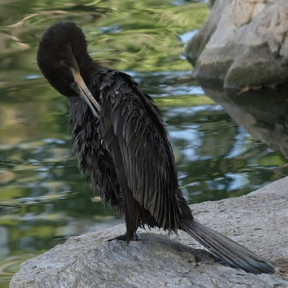

In [7]:
to_pil(srdata[0][1])

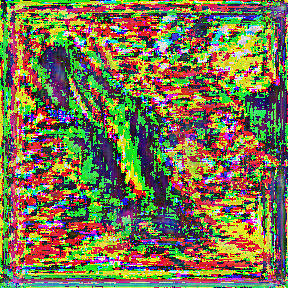

In [8]:
out = johnsonsr(prep_img(srdata[0][0]))
to_pil(out.data.cpu()[0])

In [9]:
history = fit(johnsonsr, srdata, criterion, optimizer, batch_size=16, shuffle=True)

Train on 5500 samples


[loss: 0.0168 ]



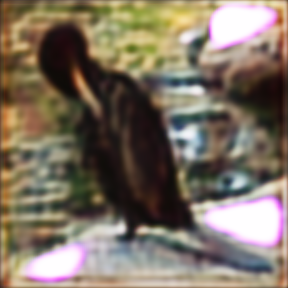

In [10]:
out = johnsonsr(prep_img(srdata[0][0]))
to_pil(out.data.cpu()[0])

Train on 5500 samples


[loss: 0.0095 ]



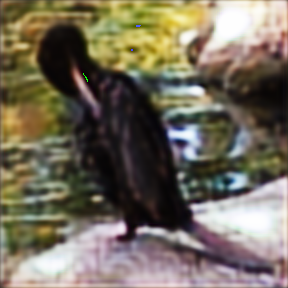

In [11]:
history = fit(johnsonsr, srdata, criterion, optimizer, batch_size=16, shuffle=True)
out = johnsonsr(prep_img(srdata[0][0]))
to_pil(out.data.cpu()[0])

In [14]:
save_checkpoint(johnsonsr.state_dict(), optimizer.state_dict(),'johnson_2epoch.pth.tar')

Train on 5500 samples


[loss: 0.0077 ]



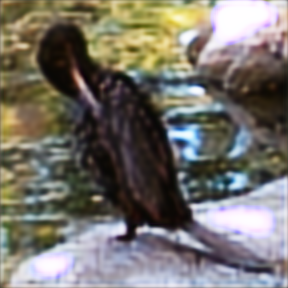

In [15]:
history = fit(johnsonsr, srdata, criterion, optimizer, batch_size=16, shuffle=True)
out = johnsonsr(prep_img(srdata[0][0]))
to_pil(out.data.cpu()[0])

Train on 5500 samples


[loss: 0.0075 ]



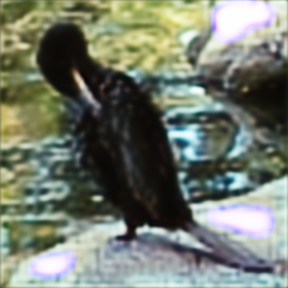

In [16]:
history = fit(johnsonsr, srdata, criterion, optimizer, batch_size=16, shuffle=True)
out = johnsonsr(prep_img(srdata[0][0]))
to_pil(out.data.cpu()[0])

In [17]:
save_checkpoint(johnsonsr.state_dict(), optimizer.state_dict(),'johnson_4epoch.pth.tar')